# This notebook curates graphics created for the Water Quality Workshop on Sept 29th, 2022

In [1]:
import sys
import os
import yaml
import numpy as np
import pandas
import pathlib
import time
from datetime import date
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl
import cmocean as cm

import xarray
from matplotlib.offsetbox import AnchoredText
sys.path.insert(1, '../scripts/')
from ssm_utils import reshape_fvcom

In [2]:
model_var="DOXG"
case="SOG_NB"
impairment=-0.25
impaired_txt='m0p25'
excel_baseline_path="/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/data/SOG_NB/DOXG/spreadsheets/"\
    f"noncompliance/{impaired_txt}/{case}_baseline_wc_noncompliant_{impaired_txt}_TS_byRegion.xlsx"


In [3]:
with open('../etc/SSM_config_SOG.yaml', 'r') as file:
    ssm = yaml.safe_load(file)
    # get shapefile path    
    shp = ssm['paths']['shapefile']


mpl.rc('font', size=11)
# some of the following may be repetetive but can also be set relative to the font value above 
#    (eg "xx-small, x-small,small, medium, large, x-large, xx-large, larger, or smaller"; see link above for details)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('legend', fontsize=12)
mpl.rc('axes', titlesize=16)
mpl.rc('axes', labelsize=12)
mpl.rc('figure', titlesize=16)
mpl.rc('text', usetex=False)
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

# Define dimension sizes and load shapefile
gdf = gpd.read_file(shp)
gdf = gdf.rename(columns={'region_inf':'Regions'})
regions = gdf[['node_id','Regions']].groupby(
    'Regions').count().index.to_list()
regions.remove('Other')

In [4]:
# Convert impairment to text string to use in file name
impaired_txt = str(impairment)
impaired_txt = impaired_txt.replace('.','p')
impaired_txt = impaired_txt.replace('-','m')

# load the baseline timeseries spreadsheet
ts_base_df=pandas.read_excel(excel_baseline_path)    
ts_base_df=ts_base_df.drop('Unnamed: 0',axis=1)
ts_base_df['date']=np.arange(
    np.datetime64('2014-01-05'), np.datetime64('2015-01-01')
)
ts_base_df.set_index('date')  

# create time array that reflects the removal of spin-up days
days = np.arange(
    ts_base_df.shape[0])+ssm['run_information']['spin_up_days']

# Create output directories if/as needed
processed_netcdf_dir = pathlib.Path(ssm['paths']['processed_output'])/case/model_var
output_directory =  pathlib.Path(ssm['paths']['graphics'])


Hood
saving /mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/graphics/SOG_NB_Hood_noncompliance_m0p25_wc_TS_2014Conditions.png
Main
saving /mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/graphics/SOG_NB_Main_noncompliance_m0p25_wc_TS_2014Conditions.png
SJF_Admiralty
saving /mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/graphics/SOG_NB_SJF_Admiralty_noncompliance_m0p25_wc_TS_2014Conditions.png
SOG_Bellingham
saving /mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/graphics/SOG_NB_SOG_Bellingham_noncompliance_m0p25_wc_TS_2014Conditions.png


/tmp/ipykernel_36591/1852606287.py:26: UserWarning: Attempting to set identical bottom == top == -0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(-2e-2*y_max, y_max)


South_Sound
saving /mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/graphics/SOG_NB_South_Sound_noncompliance_m0p25_wc_TS_2014Conditions.png
Whidbey
saving /mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/graphics/SOG_NB_Whidbey_noncompliance_m0p25_wc_TS_2014Conditions.png


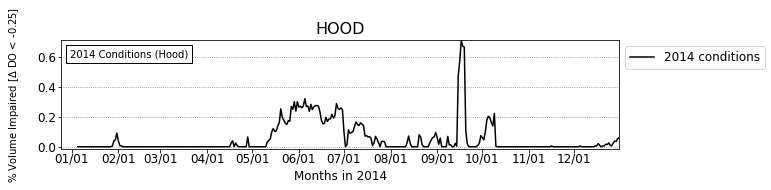

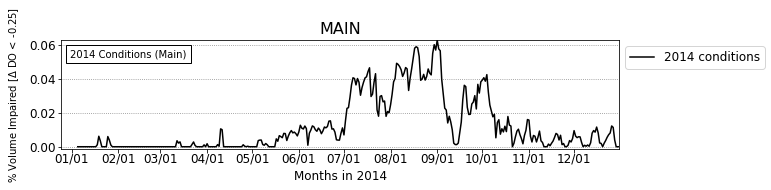

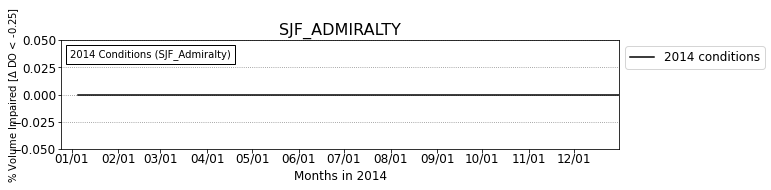

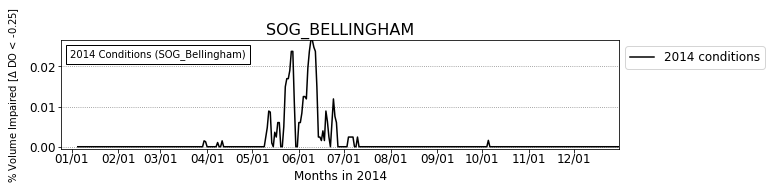

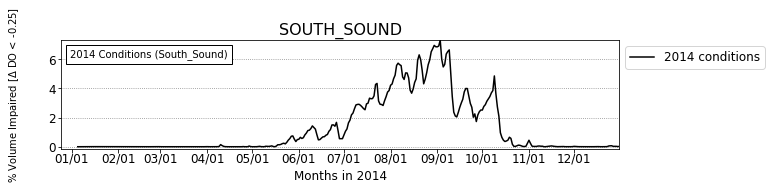

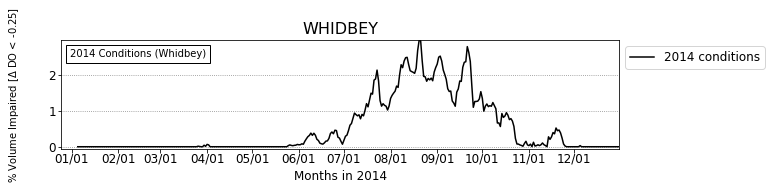

In [5]:

for region in regions:
    print(region)
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6/3),
                   gridspec_kw={
                       'width_ratios': [1],
                       'height_ratios': [1],
                   'wspace': 0.25,
                   'hspace': 0.15})
     # plot results
    ax.plot(
        ts_base_df['date'], 
        ts_base_df[region],
        color='black',
        label='2014 conditions'
    )
    ax.grid(axis='y', color='grey',ls='dotted')
    anchored_text = AnchoredText(
        f'2014 Conditions ({region})', 
        loc='upper left',
        frameon=True,
        prop=dict(fontweight="normal",color="black")
    )
    ax.add_artist(anchored_text) 
    # set the ylim to the maximum between scenario and baseline
    y_max = np.max(ts_base_df[region])
    ax.set_ylim(-2e-2*y_max, y_max)
    ax.set_xlim(np.datetime64('2013-12-25'), np.datetime64('2014-12-31'))
    # set x-ticklabels to the 15th day of the month 
    ax.xaxis.set_major_locator(mpl.dates.MonthLocator(bymonthday=15))
    # set x-ticklabels to the first day of the month
    ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
    ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%m/%d'))
    
    fig.text(0.05, 0.5, 
             f'% Volume Impaired [$\Delta$ DO < {impairment}]', 
             va='center', rotation='vertical'
            )
    ax.set_title(region.upper(), 
             fontsize=16
        )
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    ax.set_xlabel('Months in 2014')

    output_file = output_directory/f'{case}_{region}_noncompliance_{impaired_txt}_wc_TS_2014Conditions.png'
    print(f'saving {output_file}')
    plt.savefig(output_file, bbox_inches='tight', format='png')

# Time series of Percent Volume Impaired

# Depth (levels) vs. time 

In [6]:
mpl.rc('font', size=16)
# some of the following may be repetetive but can also be set relative to the font value above 
#    (eg "xx-small, x-small,small, medium, large, x-large, xx-large, larger, or smaller"; see link above for details)
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)
mpl.rc('legend', fontsize=14)
mpl.rc('axes', titlesize=16)
mpl.rc('axes', labelsize=16)
mpl.rc('figure', titlesize=16)
mpl.rc('text', usetex=False)
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

In [15]:
%%time

node_id=6369 #Bbay low DO
# use NO3 directory to get a list of subdirectories 
model_var='NO3'

paths=[
    '/mmfs1/gscratch/ssmc/USRS/PSI/Sukyong/kingcounty/wqm_baseline/ssm_output.nc',
    '/mmfs1/gscratch/ssmc/USRS/PSI/Sukyong/kingcounty/wqm_reference/ssm_output.nc'
]
case=[
    'base',
    'ref'
]
hourly_values={}
NO_2d={}
DO_2d={}
sal_2d={}

for idx,path in enumerate(paths):
    ds = xarray.open_dataset(path,engine='netcdf4')
    hourly_values[case[idx]] = reshape_fvcom(
        ds['NO3'],'days'
    )
    NO_2d[case[idx]] = ds['NO3'][:,:,node_id-1]+ds['NH4'][:,:,node_id-1]
    DO_2d[case[idx]] = ds['DOXG'][:,:,node_id-1]
    sal_2d[case[idx]]=ds['salinity'][:,:,node_id-1]


8784 10 16012
8784 10 16012
CPU times: user 180 ms, sys: 11.5 s, total: 11.6 s
Wall time: 51.8 s


In [11]:
# create date vector
dti = pandas.date_range("2014-01-01", periods=24*366, freq="H")
dti[-1]

# NO_2d = ds['NO3'][:,:,node_id-1]+ds['NH4'][:,:,node_id-1]
# DO_2d = ds['DOXG'][:,:,node_id-1]
# sal_2d=ds['salinity'][:,:,node_id-1]

Timestamp('2015-01-01 23:00:00', freq='H')

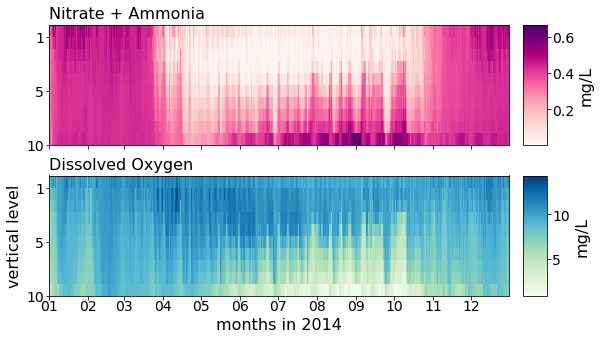

In [12]:
case='base'
fig, axs = plt.subplots(2,1, figsize = (10,5),
    gridspec_kw={
       'width_ratios': [1],
       'height_ratios': [1,1], 
        'wspace': 0.25,
        'hspace': 0.25})
no3mesh=axs[0].pcolormesh(dti,[1,2,3,4,5,6,7,8,9,10],np.flip(NO_2d[case].transpose(),axis=0),cmap='RdPu')
doxgmesh=axs[1].pcolormesh(dti,[1,2,3,4,5,6,7,8,9,10],np.flip(DO_2d[case].transpose(),axis=0),cmap='GnBu')

cb0=fig.colorbar(no3mesh, ax=axs[0], pad = 0.025, label='mg/L',aspect=5)
cb1=fig.colorbar(doxgmesh, ax=axs[1], pad = 0.025, label='mg/L',aspect=5)

for ya in [0,1]:
    axs[ya].set_xlim(np.datetime64('2014-01-01'), np.datetime64('2014-12-31'))
    # set x-ticklabels to the first day of the month
    axs[ya].xaxis.set_major_locator(mpl.dates.MonthLocator())
    axs[ya].xaxis.set_major_formatter(mpl.dates.DateFormatter('%m'))
    axs[ya].set_yticks([0.5,5,9.5])
    axs[ya].set_yticklabels(['10','5','1'])

    
axs[0].set_title('Nitrate + Ammonia',loc='left')
axs[1].set_title('Dissolved Oxygen',loc='left')

axs[0].set_xticklabels('')            
axs[1].set_xlabel('months in 2014')
axs[1].set_ylabel('vertical level')
plt.savefig(pathlib.Path(ssm['paths']['graphics'])/'Hourly_NO3_DOXG.png',
                bbox_inches='tight',format='png')
plt.show()

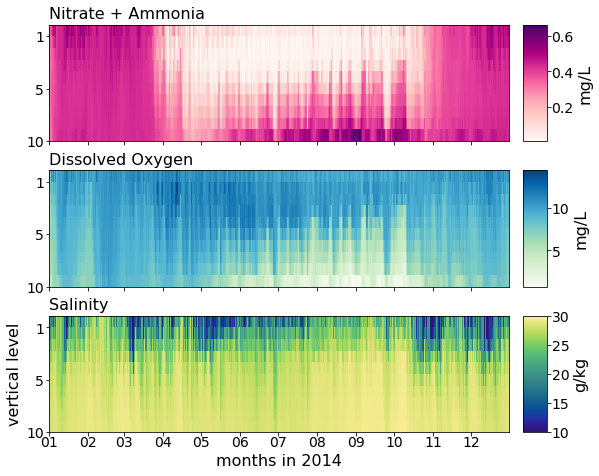

In [13]:
fig, axs = plt.subplots(3,1, figsize = (10,5*3/2),
    gridspec_kw={
       'width_ratios': [1],
       'height_ratios': [1,1,1], 
        'wspace': 0.25,
        'hspace': 0.25})
no3mesh=axs[0].pcolormesh(dti,[1,2,3,4,5,6,7,8,9,10],np.flip(NO_2d[case].transpose(),axis=0),cmap='RdPu')
#axs[0].contour(dti,[1,2,3,4,5,6,7,8,9,10],np.flip(NO_2d.transpose(),axis=0),[0.4],colors="white")
doxgmesh=axs[1].pcolormesh(dti,[1,2,3,4,5,6,7,8,9,10],np.flip(DO_2d[case].transpose(),axis=0),cmap='GnBu')
#axs[1].contour(dti,[1,2,3,4,5,6,7,8,9,10],np.flip(DO_2d.transpose(),axis=0),[10],colors="white")
salmesh=axs[2].pcolormesh(dti,[1,2,3,4,5,6,7,8,9,10],np.flip(sal_2d[case].transpose(),axis=0),cmap=cm.cm.haline,vmin=10,vmax=30)
#axs[2].contour(dti, [1,2,3,4,5,6,7,8,9,10],np.flip(sal_2d.transpose(),axis=0), [28], colors='white')

cb0=fig.colorbar(no3mesh, ax=axs[0], pad = 0.025, label='mg/L',aspect=5)
cb1=fig.colorbar(doxgmesh, ax=axs[1], pad = 0.025, label='mg/L',aspect=5)
cb2=fig.colorbar(salmesh, ax=axs[2], pad = 0.025, label='g/kg',aspect=5)

for ya in [0,1,2]:
    axs[ya].set_xlim(np.datetime64('2014-01-01'), np.datetime64('2014-12-31'))
    # set x-ticklabels to the first day of the month
    axs[ya].xaxis.set_major_locator(mpl.dates.MonthLocator())
    axs[ya].xaxis.set_major_formatter(mpl.dates.DateFormatter('%m'))
    axs[ya].set_yticks([0.5,5,9.5])
    axs[ya].set_yticklabels(['10','5','1'])

    
axs[0].set_title('Nitrate + Ammonia',loc='left')
axs[1].set_title('Dissolved Oxygen',loc='left')
axs[2].set_title('Salinity',loc='left')

axs[0].set_xticklabels('')   
axs[1].set_xticklabels('')    
axs[2].set_xlabel('months in 2014')
axs[2].set_ylabel('vertical level')
plt.savefig(pathlib.Path(ssm['paths']['graphics'])/'Hourly_NO3_DOXG_salinity.png',
                bbox_inches='tight',format='png')
plt.show()

## Plot residuals

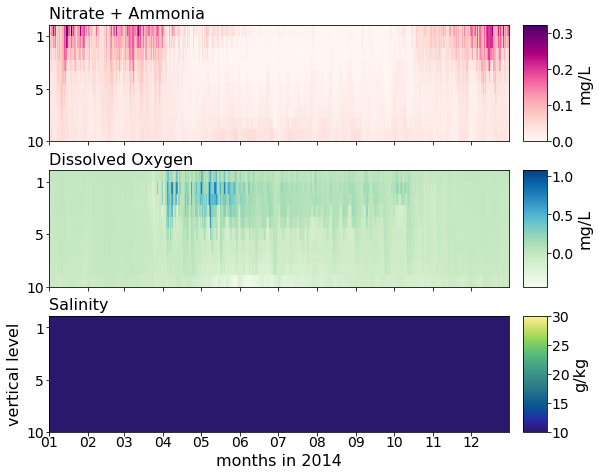

In [16]:
fig, axs = plt.subplots(3,1, figsize = (10,5*3/2),
    gridspec_kw={
       'width_ratios': [1],
       'height_ratios': [1,1,1], 
        'wspace': 0.25,
        'hspace': 0.25})
no3mesh=axs[0].pcolormesh(
    dti,
    [1,2,3,4,5,6,7,8,9,10],
    np.flip(NO_2d['base'].transpose()-NO_2d['ref'].transpose(),
            axis=0),cmap='RdPu')
#axs[0].contour(dti,[1,2,3,4,5,6,7,8,9,10],np.flip(NO_2d.transpose(),axis=0),[0.4],colors="white")
doxgmesh=axs[1].pcolormesh(
    dti,
    [1,2,3,4,5,6,7,8,9,10],
    np.flip(DO_2d['base'].transpose()-DO_2d['ref'].transpose(),
            axis=0),cmap='GnBu')
#axs[1].contour(dti,[1,2,3,4,5,6,7,8,9,10],np.flip(DO_2d.transpose(),axis=0),[10],colors="white")
salmesh=axs[2].pcolormesh(
    dti,
    [1,2,3,4,5,6,7,8,9,10],
    np.flip(sal_2d['base'].transpose()-sal_2d['ref'].transpose(),
            axis=0),cmap=cm.cm.haline,vmin=10,vmax=30)
#axs[2].contour(dti, [1,2,3,4,5,6,7,8,9,10],np.flip(sal_2d.transpose(),axis=0), [28], colors='white')

cb0=fig.colorbar(no3mesh, ax=axs[0], pad = 0.025, label='mg/L',aspect=5)
cb1=fig.colorbar(doxgmesh, ax=axs[1], pad = 0.025, label='mg/L',aspect=5)
cb2=fig.colorbar(salmesh, ax=axs[2], pad = 0.025, label='g/kg',aspect=5)

for ya in [0,1,2]:
    axs[ya].set_xlim(np.datetime64('2014-01-01'), np.datetime64('2014-12-31'))
    # set x-ticklabels to the first day of the month
    axs[ya].xaxis.set_major_locator(mpl.dates.MonthLocator())
    axs[ya].xaxis.set_major_formatter(mpl.dates.DateFormatter('%m'))
    axs[ya].set_yticks([0.5,5,9.5])
    axs[ya].set_yticklabels(['10','5','1'])

    
axs[0].set_title('Nitrate + Ammonia',loc='left')
axs[1].set_title('Dissolved Oxygen',loc='left')
axs[2].set_title('Salinity',loc='left')

axs[0].set_xticklabels('')   
axs[1].set_xticklabels('')    
axs[2].set_xlabel('months in 2014')
axs[2].set_ylabel('vertical level')
plt.savefig(pathlib.Path(ssm['paths']['graphics'])/'Hourly_NO3_DOXG_salinity_residuals.png',
                bbox_inches='tight',format='png')
plt.show()

In [ ]:
ssm['paths']['graphics']

In [ ]:
fig, axs = plt.subplots(1,1, figsize = (10,5*3/2),
    gridspec_kw={
       'width_ratios': [1],
       'height_ratios': [1], 
        'wspace': 0.25,
        'hspace': 0.25})
salmesh=axs.pcolormesh(dti,[1,2,3,4,5,6,7,8,9,10],np.flip(sal_2d[case].transpose(),axis=0),cmap=cm.cm.haline,vmin=10,vmax=32)
axs.contour(dti, [1,2,3,4,5,6,7,8,9,10],np.flip(sal_2d[case].transpose(),axis=0), [28], colors='grey')